# 분산분석

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

1. 일원분산분석

In [2]:
major = ['ma','ar','en','ma','ar','ma','ar','en','ma','en','ma','en']
soju = [2.5,0.5,2.0,3.0,2.0,2.0,1.0,1.0,1.0,0.5,3.0,1.5]

df = pd.DataFrame({'major' : major, 'soju' : soju})

print(df[df.major =='ar'])
print(df[df.major =='en'])
print(df[df.major =='ma'])

formula = 'soju ~ C(major)' # Categorical data
model = ols(formula, df).fit() # ols : 최소제곱법

print(sm.stats.anova_lm(model))

  major  soju
1    ar   0.5
4    ar   2.0
6    ar   1.0
   major  soju
2     en   2.0
7     en   1.0
9     en   0.5
11    en   1.5
   major  soju
0     ma   2.5
3     ma   3.0
5     ma   2.0
8     ma   1.0
10    ma   3.0
           df    sum_sq  mean_sq         F    PR(>F)
C(major)  2.0  3.450000  1.72500  2.976038  0.101844
Residual  9.0  5.216667  0.57963       NaN       NaN


In [3]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   soju   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     2.976
Date:                Thu, 18 May 2023   Prob (F-statistic):              0.102
Time:                        15:24:11   Log-Likelihood:                -12.029
No. Observations:                  12   AIC:                             30.06
Df Residuals:                       9   BIC:                             31.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1667      0.440      2.

c:\Users\admin\anaconda3\envs\python3112\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


2. 이원분산분석

> 이원분산분석 주효과

In [4]:
df = pd.read_csv('./data/data_2_2.csv')
df

,volumn,south,north
0,large,10,7
1,medium,8,3
2,small,4,1


In [5]:
# data 변환
# melt : 컬럼을 녹여 행으로 나열
df = df.melt(id_vars = ['volumn'],var_name = 'location', value_name = 'sales')
df

,volumn,location,sales
0,large,south,10
1,medium,south,8
2,small,south,4
3,large,north,7
4,medium,north,3
5,small,north,1


In [6]:
formula = 'sales ~ C(volumn) + C(location)'
model = ols(formula, df).fit()

print(sm.stats.anova_lm(model))
print(model.summary())

              df     sum_sq    mean_sq      F    PR(>F)
C(volumn)    2.0  36.000000  18.000000  27.00  0.035714
C(location)  1.0  20.166667  20.166667  30.25  0.031504
Residual     2.0   1.333333   0.666667    NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     28.08
Date:                Thu, 18 May 2023   Prob (F-statistic):             0.0346
Time:                        15:24:11   Log-Likelihood:                -4.0014
No. Observations:                   6   AIC:                             16.00
Df Residuals:                       2   BIC:                             15.17
Df Model:                           3                                         
Covariance Type:            nonrobust                            

c:\Users\admin\anaconda3\envs\python3112\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


> 2. 이원분산분석 주효과 + 상호작용효과

In [7]:
df = pd.read_csv('./data/data_2_3.csv')
df

,id,volumn,location,sales
0,1,large,south,15
1,2,large,south,17
2,3,large,south,14
3,4,large,north,6
4,5,large,north,5
5,6,large,north,7
6,7,medium,south,9
7,8,medium,south,8
8,9,medium,north,8
9,10,medium,north,7


In [8]:
formula = 'sales ~ C(volumn) * C(location)' # 상호작용
model = ols(formula, df).fit()

print(sm.stats.anova_lm(model))
# print(model.summary())


# pooling
formula_p = 'sales ~ C(volumn) + C(location)'
model_p = ols(formula_p, df).fit()

print(sm.stats.anova_lm(model_p))
# print(model_p.summary())

                        df     sum_sq    mean_sq          F    PR(>F)
C(volumn)              2.0  65.200000  32.600000  28.859016  0.000122
C(location)            1.0  65.772973  65.772973  58.225255  0.000032
C(volumn):C(location)  2.0  66.193694  33.096847  29.298848  0.000115
Residual               9.0  10.166667   1.129630        NaN       NaN
               df     sum_sq    mean_sq         F    PR(>F)
C(volumn)     2.0  65.200000  32.600000  4.696154  0.033542
C(location)   1.0  65.772973  65.772973  9.474847  0.010506
Residual     11.0  76.360360   6.941851       NaN       NaN


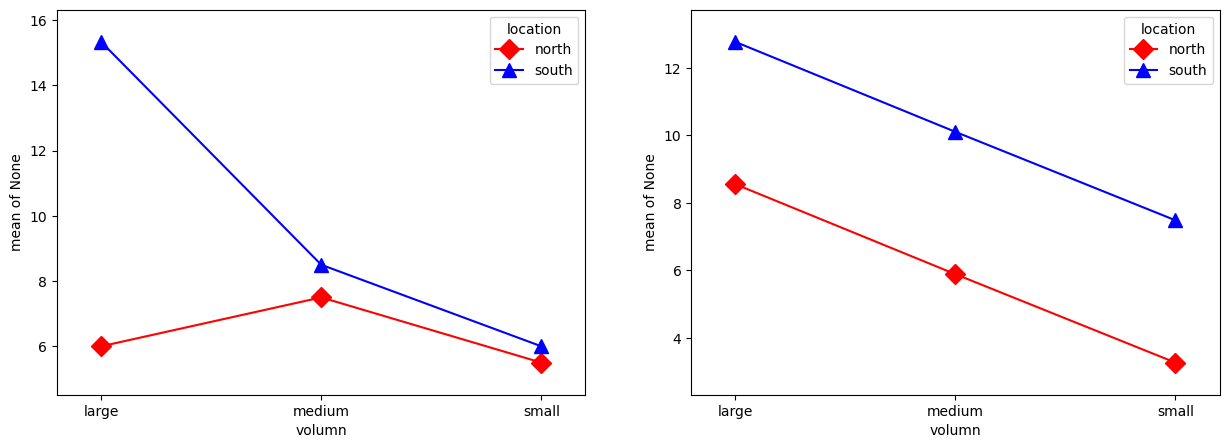

In [9]:
# interaction plot (상호작용)
from statsmodels.graphics.factorplots import interaction_plot
fig, axes = plt.subplots(1,2,figsize = (15,5))

fig = interaction_plot(df.volumn, df.location, model.fittedvalues,
                       colors = ['r','b'], markers=['D','^'], ms = 10, ax= axes[0])

# pooling한 값
fig = interaction_plot(df.volumn, df.location, model_p.fittedvalues,
                       colors = ['r','b'], markers=['D','^'], ms = 10, ax= axes[1])


import matplotlib.pyplot as plt
plt.show()

> 3. 분산분석실습


In [10]:
import pandas as pd
from scipy.stats import shapiro, bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

filename = 'data/ex_3_1.csv'
df = pd.read_csv(filename)

a1 = df.strength[df.temp == 'A1']
a2 = df.strength[df.temp == 'A2']
a3 = df.strength[df.temp == 'A3']
a4 = df.strength[df.temp == 'A4']

print(a1,a2,a3,a4, sep='\n')
df

4     8.44
7     8.36
11    8.28
Name: strength, dtype: float64
1    8.59
6    8.91
9    8.60
Name: strength, dtype: float64
0    9.34
3    9.41
8    9.69
Name: strength, dtype: float64
2     8.92
5     8.92
10    8.74
Name: strength, dtype: float64


,temp,strength
0,A3,9.34
1,A2,8.59
2,A4,8.92
3,A3,9.41
4,A1,8.44
5,A4,8.92
6,A2,8.91
7,A1,8.36
8,A3,9.69
9,A2,8.60


A1 : stat = 1.0000, p-value = 1.0000
A2 : stat = 0.7734, p-value = 0.0525
A3 : stat = 0.8929, p-value = 0.3631
A4 : stat = 0.7500, p-value = -0.0000
**************************************************************************


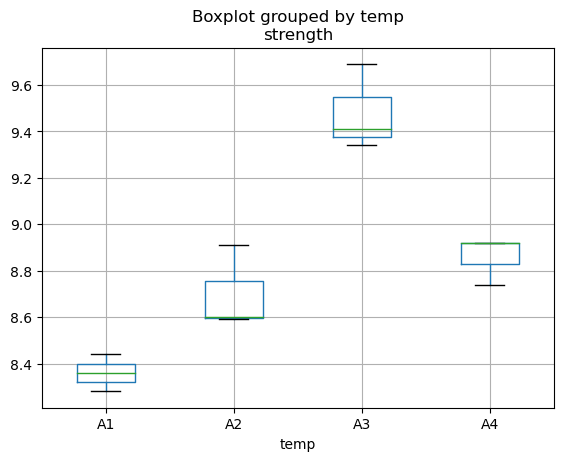

In [11]:
# 정규성 검정. shapiro test
df.boxplot('strength', by = 'temp')
s,p = shapiro(a1); print('A1 : stat = %.4f, p-value = %.4f' %(s,p))
s,p = shapiro(a2); print('A2 : stat = %.4f, p-value = %.4f' %(s,p))
s,p = shapiro(a3); print('A3 : stat = %.4f, p-value = %.4f' %(s,p))
s,p = shapiro(a4); print('A4 : stat = %.4f, p-value = %.4f' %(s,p))
print('**************************************************************************')

In [12]:
# 등분산검정 : Bartlett, Levene test
print('\n****** Equal Variance Test ********************')
s,p = bartlett(a1,a2,a3,a4)
print('Bartlett: stat = %.4f, p = %.4f' %(s,p))

s,p = levene(a1,a2,a3,a4)
print('Levene:   stat = %.4f, p = %.4f' %(s,p))
print('***********************************************')


****** Equal Variance Test ********************
Bartlett: stat = 1.5493, p = 0.6709
Levene:   stat = 0.1900, p = 0.9003
***********************************************


> 3-1. 일원분산분석

In [13]:
formula = 'strength ~ C(temp)'
model = ols(formula, data = df).fit()
print(anova_lm(model))
model.summary()

           df  sum_sq  mean_sq          F    PR(>F)
C(temp)   3.0  1.9788  0.65960  31.186761  0.000092
Residual  8.0  0.1692  0.02115        NaN       NaN


c:\Users\admin\anaconda3\envs\python3112\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     31.19
Date:                Thu, 18 May 2023   Prob (F-statistic):           9.17e-05
Time:                        15:24:12   Log-Likelihood:                 8.5422
No. Observations:                  12   AIC:                            -9.084
Df Residuals:                       8   BIC:                            -7.145
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.3600      0.084     99.566      0.000       8.166       8.554
C(temp)[T.A2]     0.3400      0.119      2.863      0.021       0.066       0.614
C(temp)[T.A3]     1.1200      0.119      9.432      0.000       0.846       1.394
C(temp)[T.A4]     0.5000      0.119      4.211      0.003       0.226       0.774
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.155
Skew:                           0.588   Prob(JB):                        0.561
Kurtosis:                       2.037   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scale-Location plot')

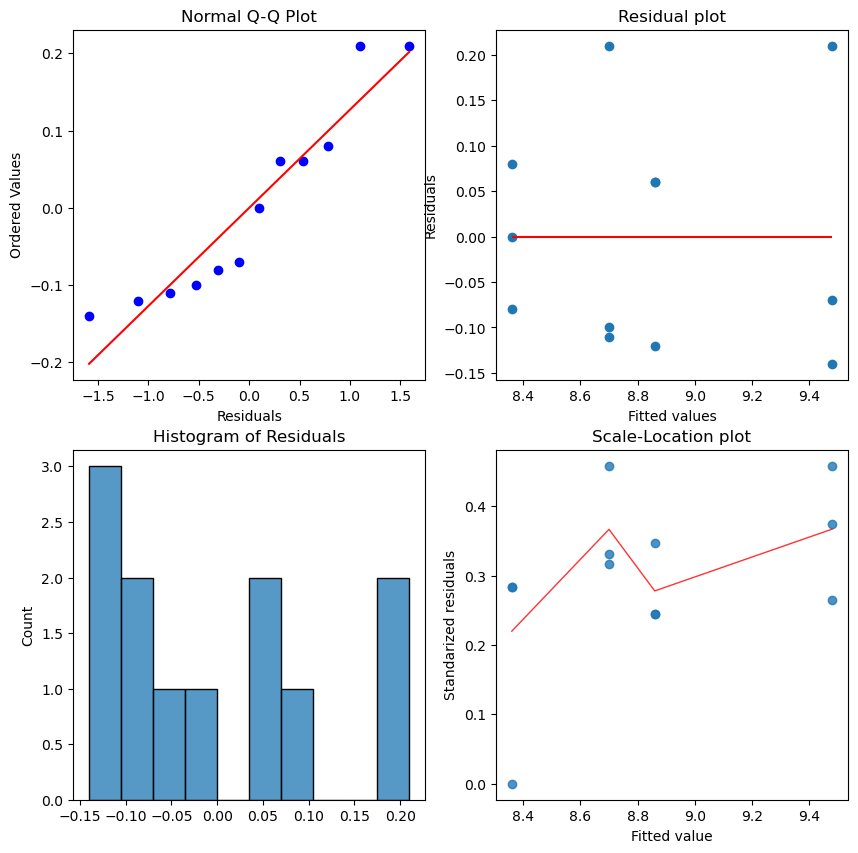

In [14]:
# 잔차 플롯
import scipy.stats as stats
fig = plt.figure(figsize = (10,10))

# regression plots 생성
resid = np.array(model.resid)
fitted = np.array(model.fittedvalues)

# Q-Q 플롯
ax1 = plt.subplot(221)
stats.probplot(resid, dist=stats.norm, sparams = (0,1), plot = plt)
plt.xlabel('Residuals')
plt.title('Normal Q-Q Plot')

# 잔차 플롯
ax1 = plt.subplot(222)
plt.scatter(fitted, resid)
plt.hlines(0,np.min(fitted),np.max(fitted),color = 'red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')

# 히스토그램
ax1 = plt.subplot(223)
sns.histplot(resid,bins=10)
#plt.hist(resid,bins=10,rwidth=0.8)
plt.title('Histogram of Residuals')

# Scale-Location plot
ax1 = plt.subplot(224)
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(resid))
sns.regplot(x=fitted, y = model_norm_residuals_abs_sqrt,
            scatter = True,
            lowess = True, # 회귀 중심선
            line_kws = {'color':'red', 'lw':1, 'alpha':0.8})
plt.ylabel('Standarized residuals')
plt.xlabel('Fitted value')
plt.title('Scale-Location plot')

> 3-2. 사후분석 다중비교

1. FWER(Familywise Error Rate): 여러 개의 가설 검정을 할 때 적어도 하나의 가설에서 1종 오류가 발생할 가능성

2. 가설검정을 많이 할 수록 FWER 증가
3. 유의수준 5%에서 가설 검정 1번 했을 때, 오류가 발생하지 않을 확률은 95%.FWER = 100% - 95% = 5%
4. 가설검정을 2번했을 때, 2번 모두 1종 오류가 발생하지 않을 확률은 95% x 95% = 90.25%, FWER = 9.75
5. 가설검정을 3번했을 때, 3번 모두 1종 오류가 발생하지 않을 확률은 95% x 95% x 95% = 85.74%, FWER = 14.26


In [15]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df.strength, df.temp)

# Bonferroni Correction
result = comp.allpairtest(scipy.stats.ttest_ind, method = 'bonf')
print(result[0])

# Tuckey's Honestly Significant Difference = '진정으로 유의미한 차이'
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df['strength'], df['temp'], alpha = 0.05)
print(hsd.summary())

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A1     A2 -2.9631 0.0414    0.2486  False
    A1     A3 -9.6157 0.0007    0.0039   True
    A1     A4 -6.6034 0.0027    0.0164   True
    A2     A3 -5.2039 0.0065     0.039   True
    A2     A4 -1.3227 0.2565       1.0  False
    A3     A4  5.0567 0.0072    0.0432   True
---------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    A1     A2     0.34 0.0807 -0.0403  0.7203  False
    A1     A3     1.12 0.0001  0.7397  1.5003   True
    A1     A4      0.5 0.0126  0.1197  0.8803   True
    A2     A3     0.78 0.0008  0.3997  1.1603   True
    A2     A4     0.16 0.5615 -0.2203  0.5403  False
    A3     A4    -0.62 0.0035 -1.0003 -0.2397   True
----------------

# 연습문제 : 반복이 없는 이원배치법

In [16]:
df = pd.read_csv('./data/ex_4_1.csv')
df

,A,B,Yield
0,A1,B1,97.6
1,A1,B2,97.3
2,A1,B3,96.7
3,A2,B1,98.6
4,A2,B2,98.2
5,A2,B3,96.9
6,A3,B1,99.0
7,A3,B2,98.0
8,A3,B3,97.9
9,A4,B1,98.0


In [17]:
# 이원분산분석 Two way Anova
formula_p = 'Yield ~ C(A) + C(B)' 
model_p = ols(formula_p, df).fit()

print(sm.stats.anova_lm(model_p))
print(model_p.summary())

           df  sum_sq   mean_sq          F    PR(>F)
C(A)      3.0    2.22  0.740000   7.928571  0.016470
C(B)      2.0    3.44  1.720000  18.428571  0.002744
Residual  6.0    0.56  0.093333        NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     12.13
Date:                Thu, 18 May 2023   Prob (F-statistic):            0.00431
Time:                        15:24:13   Log-Likelihood:                 1.3611
No. Observations:                  12   AIC:                             9.278
Df Residuals:                       6   BIC:                             12.19
Df Model:                           5                                         
Covariance Type:            nonrobust                                        

c:\Users\admin\anaconda3\envs\python3112\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Yield : stat = 0.9235, p-value = 0.3161


Text(0.5, 1.0, 'Scale-Location plot')

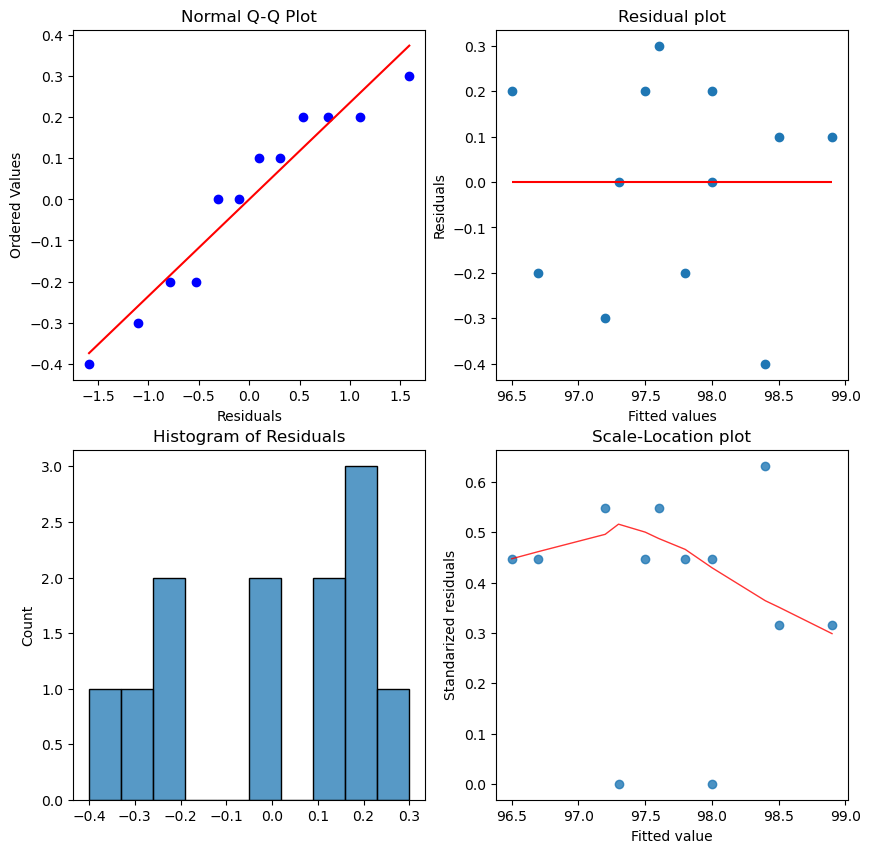

In [18]:
# 잔차 플롯
fig = plt.figure(figsize = (10,10))

# regression plots 생성
resid = np.array(model_p.resid)
fitted = np.array(model_p.fittedvalues)

# 정규성검정
s,p = shapiro(resid); print('Yield : stat = %.4f, p-value = %.4f' %(s,p))

# Q-Q 플롯
ax1 = plt.subplot(221)
stats.probplot(resid, dist=stats.norm, sparams = (0,1), plot = plt)
plt.xlabel('Residuals')
plt.title('Normal Q-Q Plot')

# 잔차 플롯
ax1 = plt.subplot(222)
plt.scatter(fitted, resid)
plt.hlines(0,np.min(fitted),np.max(fitted),color = 'red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')

# 히스토그램
ax1 = plt.subplot(223)
sns.histplot(resid,bins=10)
#plt.hist(resid,bins=10,rwidth=0.8)
plt.title('Histogram of Residuals')

# Scale-Location plot
ax1 = plt.subplot(224)
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(resid))
sns.regplot(x=fitted, y = model_norm_residuals_abs_sqrt,
            scatter = True,
            lowess = True, # 회귀 중심선
            line_kws = {'color':'red', 'lw':1, 'alpha':0.8})
plt.ylabel('Standarized residuals')
plt.xlabel('Fitted value')
plt.title('Scale-Location plot')

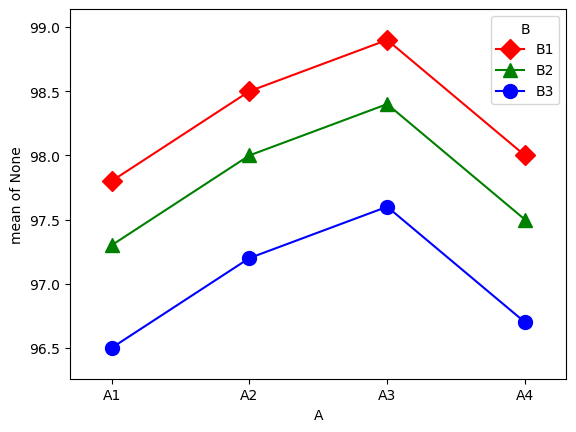

In [19]:
# interaction plot (상호작용)
fig = interaction_plot(df.A, df.B, model_p.fittedvalues,
                       colors = ['r','g','b'],
                       markers=['D','^','o'], ms = 10)


import matplotlib.pyplot as plt
plt.show()

In [20]:
a1 = df.Yield[df.A == 'A1']
a2 = df.Yield[df.A == 'A2']
a3 = df.Yield[df.A == 'A3']
a4 = df.Yield[df.A == 'A4']
b1 = df.Yield[df.B == 'B1']
b2 = df.Yield[df.B == 'B2']
b3 = df.Yield[df.B == 'B3']

print(a1,a2,a3,a4,b1,b2,b3, sep='\n')
df

0    97.6
1    97.3
2    96.7
Name: Yield, dtype: float64
3    98.6
4    98.2
5    96.9
Name: Yield, dtype: float64
6    99.0
7    98.0
8    97.9
Name: Yield, dtype: float64
9     98.0
10    97.7
11    96.5
Name: Yield, dtype: float64
0    97.6
3    98.6
6    99.0
9    98.0
Name: Yield, dtype: float64
1     97.3
4     98.2
7     98.0
10    97.7
Name: Yield, dtype: float64
2     96.7
5     96.9
8     97.9
11    96.5
Name: Yield, dtype: float64


,A,B,Yield
0,A1,B1,97.6
1,A1,B2,97.3
2,A1,B3,96.7
3,A2,B1,98.6
4,A2,B2,98.2
5,A2,B3,96.9
6,A3,B1,99.0
7,A3,B2,98.0
8,A3,B3,97.9
9,A4,B1,98.0


Yield : stat = 0.9726, p-value = 0.9363
**************************************************************************


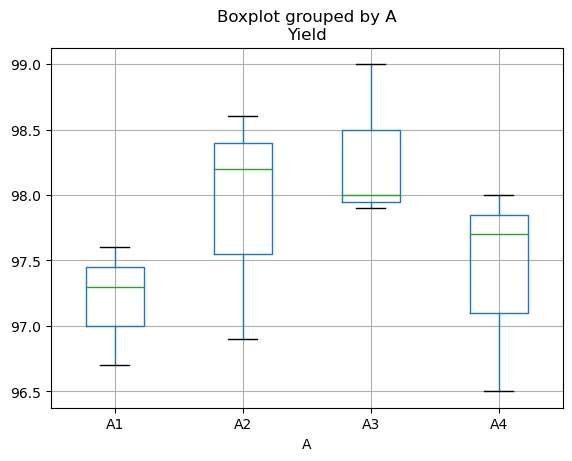

In [21]:
# 정규성 검정. shapiro test
df.boxplot('Yield', by = 'A')
s,p = shapiro(df.Yield); print('Yield : stat = %.4f, p-value = %.4f' %(s,p))
print('**************************************************************************')

In [22]:
# 등분산검정 : Bartlett, Levene test
print('\n****** Equal Variance Test ********************')
s,p = bartlett(a1,a2,a3,a4)
print('Bartlett(A): stat = %.4f, p = %.4f' %(s,p))
s,p = bartlett(b1,b2,b3)
print('Bartlett(B): stat = %.4f, p = %.4f' %(s,p))

s,p = levene(a1,a2,a3,a4)
print('Levene(A):   stat = %.4f, p = %.4f' %(s,p))
s,p = levene(b1,b2,b3)
print('Levene(B):   stat = %.4f, p = %.4f' %(s,p))

print('***********************************************')


****** Equal Variance Test ********************
Bartlett(A): stat = 0.7946, p = 0.8508
Bartlett(B): stat = 0.6564, p = 0.7202
Levene(A):   stat = 0.1449, p = 0.9301
Levene(B):   stat = 0.3789, p = 0.6950
***********************************************


In [23]:
# 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp_A = MultiComparison(df.Yield, df.A)

# Bonferroni Correction
result_A = comp_A.allpairtest(scipy.stats.ttest_ind, method = 'bonf')
print(result_A[0])

# Tuckey's Honestly Significant Difference = '진정으로 유의미한 차이'
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd_A = pairwise_tukeyhsd(df['Yield'], df['A'], alpha = 0.05)
print(hsd_A.summary())

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A1     A2 -1.2124 0.2921       1.0  False
    A1     A3 -2.5017 0.0666    0.3999  False
    A1     A4  -0.378 0.7247       1.0  False
    A2     A3 -0.6433 0.5551       1.0  False
    A2     A4  0.7268 0.5076       1.0  False
    A3     A4  1.5588  0.194       1.0  False
---------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    A1     A2      0.7 0.6367 -1.1489 2.5489  False
    A1     A3      1.1  0.298 -0.7489 2.9489  False
    A1     A4      0.2 0.9847 -1.6489 2.0489  False
    A2     A3      0.4  0.897 -1.4489 2.2489  False
    A2     A4     -0.5  0.822 -2.3489 1.3489  False
    A3     A4     -0.9 0.4502 -2.7489 0.9489  False
-------------------------

In [24]:
# 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp_B = MultiComparison(df.Yield, df.B)

# Bonferroni Correction
result_B = comp_B.allpairtest(scipy.stats.ttest_ind, method = 'bonf')
print(result_B[0])

# Tuckey's Honestly Significant Difference = '진정으로 유의미한 차이'
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd_B = pairwise_tukeyhsd(df['Yield'], df['B'], alpha = 0.05)
print(hsd_B.summary())

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
    B1     B2 1.3608 0.2225    0.6674  False
    B1     B3 2.9566 0.0254    0.0762  False
    B2     B3 2.1773 0.0723     0.217  False
--------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    B1     B2     -0.5 0.4441 -1.5972  0.5972  False
    B1     B3     -1.3 0.0224 -2.3972 -0.2028   True
    B2     B3     -0.8 0.1592 -1.8972  0.2972  False
----------------------------------------------------
